In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree # importing the tree module from sklearn
from sklearn import metrics # importing the metrics module from sklearn
from sklearn.model_selection import train_test_split # importing the train_test_split function from sklearn's model_selection module

In [2]:
df = pd.read_csv('data/News_dataset/final_features.csv')


In [3]:
df.head()

,title,text,subject,label,text_length,title_length,length_phrases_no_punctuation_text,length_phrases_no_punctuation_title,qtt_numbers,qtt_noms_propis,...,capital_title,reference_count,word_length,sentiment_polarity,subjectivity_score,avg_sentence_length,character_count,exclamation_mark_count,question_mark_count,capitalized_word_count
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True,4659,64,17.904762,3.666667,17,88,...,4,3,4.914921,0.037083,0.410250,29.500000,4659,0,0,12
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True,4077,64,17.081081,3.333333,9,71,...,4,2,5.237500,0.055880,0.298557,33.952381,4077,0,0,9
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True,2789,60,20.909091,2.750000,2,75,...,7,2,4.847639,0.115930,0.316798,30.764706,2789,0,0,9
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True,2461,59,18.000000,9.000000,3,75,...,8,2,5.197943,0.035968,0.306569,27.312500,2461,0,0,5
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True,5204,69,14.982759,11.000000,34,92,...,4,4,4.752554,0.030093,0.399891,24.675000,5204,1,1,15


In [4]:
X = df.iloc[:,4:]

X

,text_length,title_length,length_phrases_no_punctuation_text,length_phrases_no_punctuation_title,qtt_numbers,qtt_noms_propis,qtt_punt,stopwords,emotional,repeated,capital_title,reference_count,word_length,sentiment_polarity,subjectivity_score,avg_sentence_length,character_count,exclamation_mark_count,question_mark_count,capitalized_word_count
0,4659,64,17.904762,3.666667,17,88,113,307,0,0,4,3,4.914921,0.037083,0.410250,29.500000,4659,0,0,12
1,4077,64,17.081081,3.333333,9,71,77,253,0,2,4,2,5.237500,0.055880,0.298557,33.952381,4077,0,0,9
2,2789,60,20.909091,2.750000,2,75,47,202,0,1,7,2,4.847639,0.115930,0.316798,30.764706,2789,0,0,9
3,2461,59,18.000000,9.000000,3,75,51,156,1,0,8,2,5.197943,0.035968,0.306569,27.312500,2461,0,0,5
4,5204,69,14.982759,11.000000,34,92,128,353,0,3,4,4,4.752554,0.030093,0.399891,24.675000,5204,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44883,3237,61,27.894737,10.000000,7,62,47,216,3,1,13,1,4.914657,0.067264,0.497359,55.300000,3237,0,1,19
44884,1684,81,23.000000,12.000000,5,24,42,136,1,0,15,1,4.364821,0.097059,0.538235,27.750000,1684,0,0,8
44885,25065,85,29.836879,14.000000,37,476,527,1873,0,19,12,12,4.719261,0.072183,0.417284,42.119266,25065,1,10,90
44886,2685,67,21.272727,12.000000,18,54,61,190,0,0,9,6,4.495798,0.088294,0.396429,50.800000,2685,0,0,23


In [5]:
y = df['label']

y

0        True
1        True
2        True
3        True
4        True
         ... 
44883    Fake
44884    Fake
44885    Fake
44886    Fake
44887    Fake
Name: label, Length: 44888, dtype: object

In [6]:
def find_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers = find_outliers_iqr(df)

print(outliers)

{'text_length': 34        6754
66        8181
71        7018
85        7858
108       6965
         ...  
44867    16767
44870    15484
44879     8002
44881     7316
44885    25065
Name: text_length, Length: 1766, dtype: int64, 'title_length': 30470    153
30479    193
30482    135
30483    147
30493    154
        ... 
43737     18
43855     18
44254     19
44520     18
44638     18
Name: title_length, Length: 2174, dtype: int64, 'length_phrases_no_punctuation_text': 131      40.000000
263      45.666667
428      40.000000
687      44.500000
842      41.500000
           ...    
44865    34.285714
44866    35.526316
44868    37.647059
44872    36.769231
44875    35.000000
Name: length_phrases_no_punctuation_text, Length: 2053, dtype: float64, 'length_phrases_no_punctuation_title': 22078    23.0
30470    23.0
30479    31.0
30482    22.0
30483    24.0
         ... 
43245    26.0
43275    25.0
43282    30.0
43286    24.0
43288    22.0
Name: length_phrases_no_punctuation_title, Length: 15

In [7]:
def count_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_counts[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outlier_counts

# Example usage
outlier_counts = count_outliers_iqr(df)
print(outlier_counts)

{'text_length': np.int64(1766), 'title_length': np.int64(2174), 'length_phrases_no_punctuation_text': np.int64(2053), 'length_phrases_no_punctuation_title': np.int64(1510), 'qtt_numbers': np.int64(2613), 'qtt_noms_propis': np.int64(2057), 'qtt_punt': np.int64(1954), 'stopwords': np.int64(1503), 'emotional': np.int64(9575), 'repeated': np.int64(3121), 'capital_title': np.int64(924), 'reference_count': np.int64(2260), 'word_length': np.int64(1365), 'sentiment_polarity': np.int64(1844), 'subjectivity_score': np.int64(2508), 'avg_sentence_length': np.int64(3603), 'character_count': np.int64(1766), 'exclamation_mark_count': np.int64(8163), 'question_mark_count': np.int64(3740), 'capitalized_word_count': np.int64(2656)}


<function matplotlib.pyplot.show(close=None, block=None)>

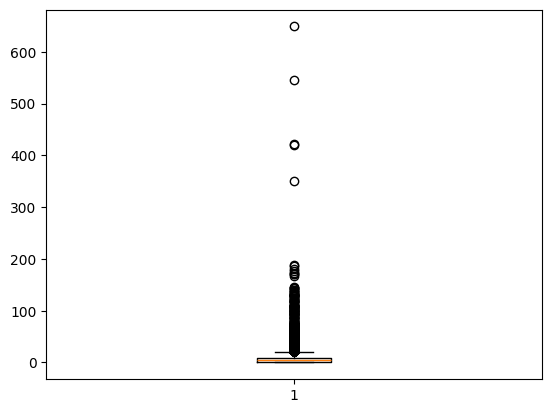

In [8]:
plt.boxplot(df['qtt_numbers'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

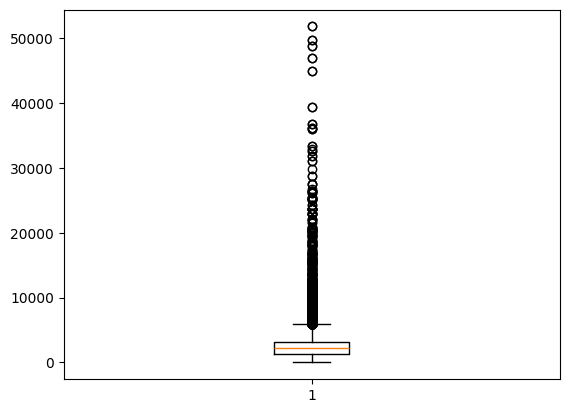

In [9]:
plt.boxplot(df['text_length'])
plt.show

### em quedo amb els outliers ja que cada notícia és un món, i els outliers en aquests casos no son valors erronis, sino que son diferents però són reals i n'hi ha suficient qtt com per quedarse'ls.

# Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
X_test.to_csv('data/News_dataset/X_test.csv', index = False)
y_test.to_csv('data/News_dataset/y_test.csv', index = False)

### data scaling on training data

#### per fer scaling no s'ha de tenir en compte les dades del test ja que aquestes no poden tocar-se a lhora de fer train ja que sinò tens data leakage i això fa que a l'hora de fer el test, no sigui 100% a cegues sinò que té pistes de l'hora de fer el train (és fer "trampes") les passes pel túnel i és el túnel que vols agafar a l'hora de fer inferencia

In [12]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [13]:
scaled_X_train.shape

(40399, 20)

In [14]:
X_train_scaled_df = pd.DataFrame(scaled_X_train, columns=X_train.columns)

In [15]:
import joblib
# Save the scaler to a file
joblib.dump(scaler, 'robust_scaler.pkl')

['robust_scaler.pkl']

In [16]:
X_train_scaled_df.to_csv('data/News_dataset/X_train_scaled.csv', index = False)
y_train.to_csv('data/News_dataset/y_train.csv', index = False)

In [17]:
robust_scaler = joblib.load('robust_scaler.pkl')

robust_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns = X_test.columns)

X_test_scaled.to_csv('data/News_dataset/X_test_scaled.csv', index = False)

### quan vulgui fer servir el túnel l he de cridar així 
# Load the scaler when needed
robust_scaler = joblib.load('robust_scaler.pkl')
new_instance_scaled = robust_scaler.transform(new_instance)